In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import lightgbm as lgb
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/nataliechang/Desktop/Eluvio_DS_Challenge.csv")

In [3]:
data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [4]:
data = data.drop(columns=['down_votes','category'])

In [5]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(data['over_18']))}
data['over_18'] = data['over_18'].map(class_mapping)
class_mapping2 = {label: idx for idx, label in enumerate(np.unique(data['author']))}
data['author'] = data['author'].map(class_mapping2)

data['date_created'] = data['date_created'].map(lambda x: x.replace('-',''))

In [6]:
data

,time_created,date_created,up_votes,title,over_18,author
0,1201232046,20080125,3,Scores killed in Pakistan clashes,0,69315
1,1201232075,20080125,2,Japan resumes refuelling mission,0,69315
2,1201232523,20080125,3,US presses Egypt on Gaza border,0,69315
3,1201233290,20080125,1,Jump-start economy: Give health care to all,0,47884
4,1201274720,20080125,4,Council of Europe bashes EU&UN terror blacklist,0,62766
...,...,...,...,...,...,...
509231,1479816764,20161122,5,Heil Trump : Donald Trump s alt-right white...,0,66229
509232,1479816772,20161122,1,There are people speculating that this could b...,0,28544
509233,1479817056,20161122,1,Professor receives Arab Researchers Award,0,1240
509234,1479817157,20161122,1,Nigel Farage attacks response to Trump ambassa...,0,75836


# Feature Selection

In [12]:
data.drop(columns=['up_votes','title'])

,time_created,date_created,over_18,author
0,1201232046,20080125,0,69315
1,1201232075,20080125,0,69315
2,1201232523,20080125,0,69315
3,1201233290,20080125,0,47884
4,1201274720,20080125,0,62766
...,...,...,...,...
509231,1479816764,20161122,0,66229
509232,1479816772,20161122,0,28544
509233,1479817056,20161122,0,1240
509234,1479817157,20161122,0,75836


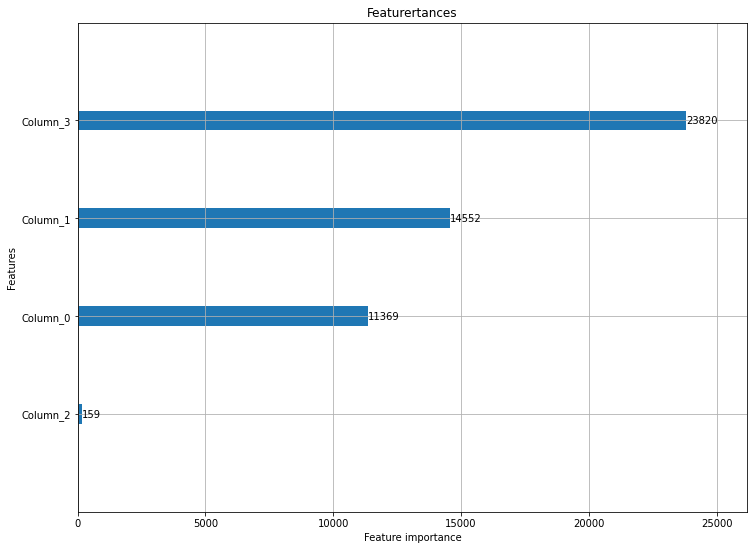

In [10]:
X = np.array(data.drop(columns=['up_votes','title']))
thre = np.quantile(data['up_votes'], 0.8)
y = [1 if i > thre else 0 for i in data['up_votes']]

model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=500, learning_rate=0.001, 
                                    max_depth=800, feature_fraction=0.8, subsample=0.2,
                                    is_unbalance=True)
model.fit(X,y)
lgb.plot_importance(model, max_num_features=5,figsize=(12,9))
plt.title("Featurertances")
plt.show()